# Exercise 1a
#### Lars Kühmichel, Ergin Kohen Sagner, Nicolas Wol

In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## 1 Monte-Carlo Simulation
### 1.1 Data Creation and Visualization

For $Y = 1$, we have $p(X = x \mid Y = 1) = 2x$ and $p(X \leq x \mid Y = 1) = \int_0^x2x'\text{d}x' = x^2$. With the Inverse Transform Sampling, $X$ is given by
$$X = CDF^{-1}(u) = \sqrt{(u)},\qquad\text{where $u$ is uniformly distributed in $[0, 1]$}$$
For $Y=1$, we have $p(X=x\mid Y=0)=2-2x$ and $p(X \leq x \mid Y = 1) = \int_0^x2-2x'\text{d}x' = 2x-x^2$.
The inverse is given by:
$$ 2x-x^2 = u \Rightarrow -x^2+2x-u = 0 \Rightarrow x = 1 \pm \sqrt{1-u}$$
where $X=1-\sqrt{1-u}$ gives the desired distribution and $u$  is uniformly distributed in $[0,1]$

<IPython.core.display.Javascript object>


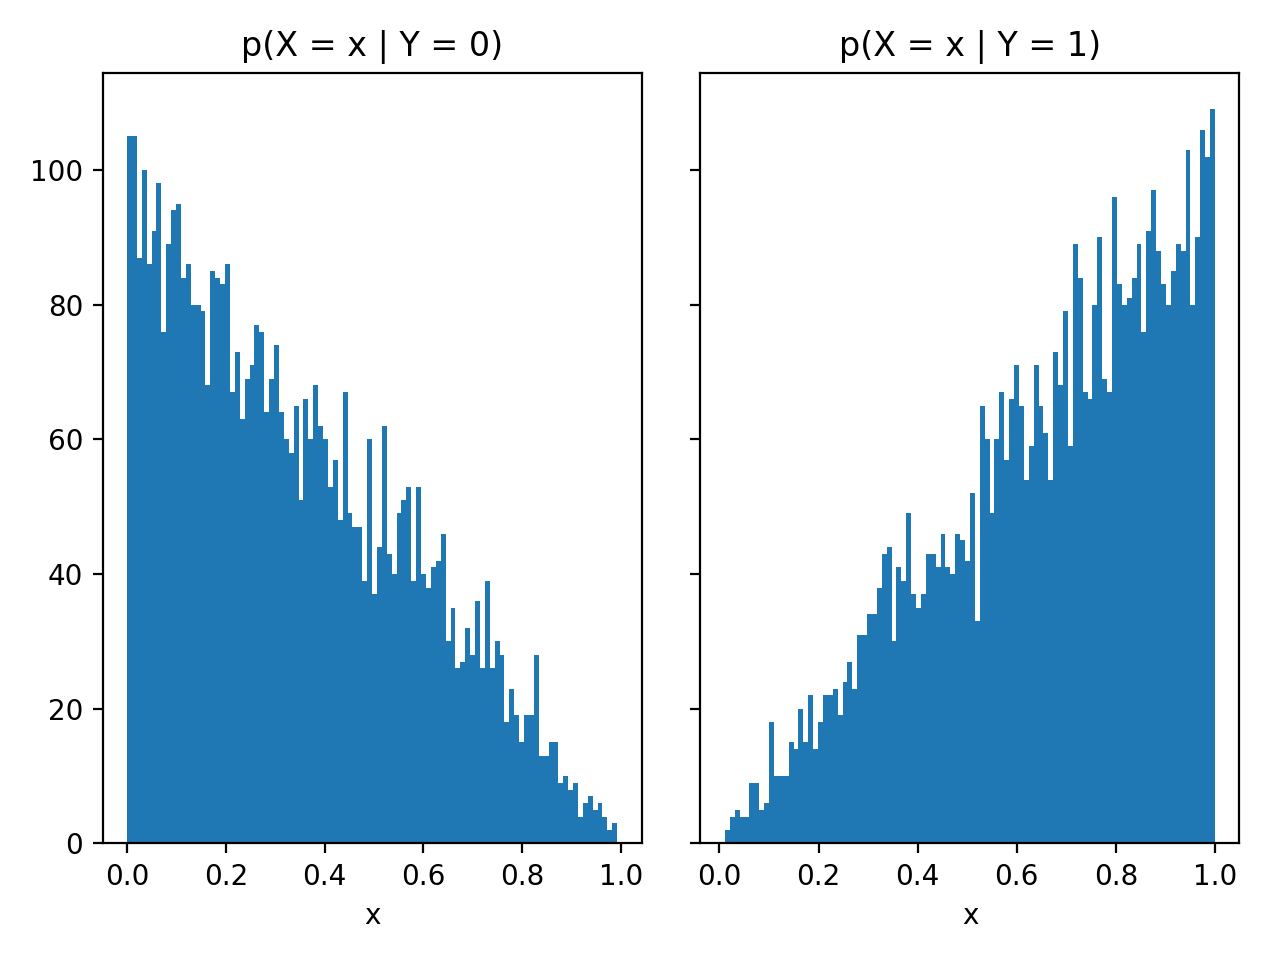

''

In [11]:
def create_features(Y):
    X = []
    for y in Y:
        if y == 0:
            # 2-2x -> 2x-x**2 = u => -x**2+2x-u = 0 => x = (2 -+ sqrt(4-4u))/2 = (1-sqrt(1-u))
            X.append((1 - np.sqrt(1-np.random.random())))
        else:
            # 2x -> x**2 = u => x = sqrt(u)
            X.append(np.sqrt(np.random.random()))
    return np.array(X)

def create_data(N):
    Y = np.random.randint(0, 2, size=N)
    
    # at least one instance of either class
    if 0 not in Y:
        Y[-1] = 0
    if 1 not in Y:
        Y[-1] = 1
        
    X = create_features(Y)
    
    return X, Y

X, Y = create_data(10000)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, num=1)
n_bins = 100
axs[0].hist(X[Y==0], bins=n_bins)
axs[0].title.set_text("p(X = x | Y = 0)")
axs[0].set_xlabel("x")
axs[1].hist(X[Y==1], bins=n_bins)
axs[1].title.set_text("p(X = x | Y = 1)")
axs[1].set_xlabel("x")
;

### 1.2 Classification by Thresholding

<IPython.core.display.Javascript object>


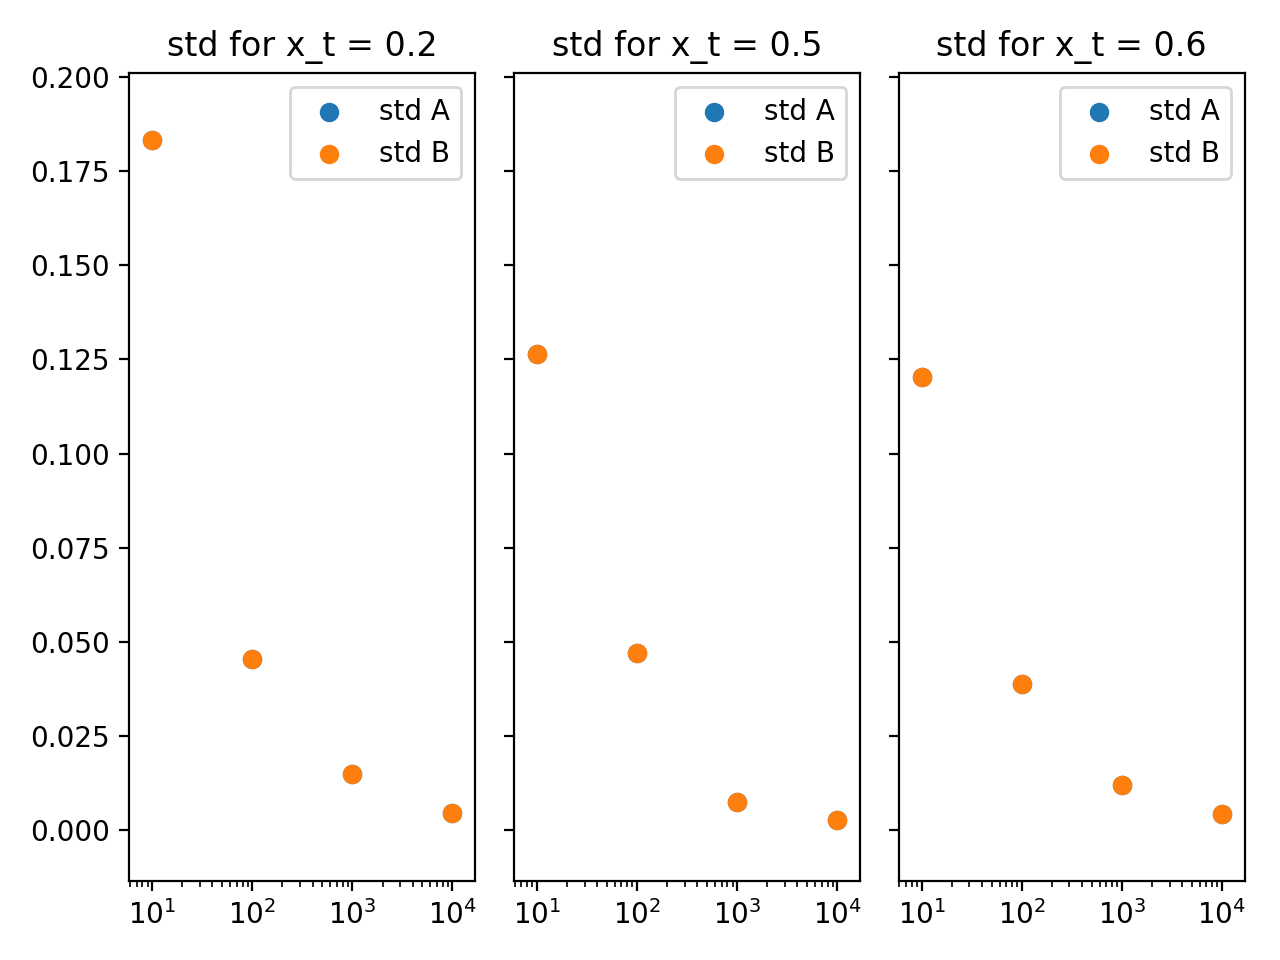

x_t = 0.2
	M = 10
		error rate A: 0.380 +- 0.183	(theo.: 0.340)
		error rate B: 0.620 +- 0.183	(theo.: 0.660)
	M = 100
		error rate A: 0.358 +- 0.046	(theo.: 0.340)
		error rate B: 0.642 +- 0.046	(theo.: 0.660)
	M = 1000
		error rate A: 0.334 +- 0.015	(theo.: 0.340)
		error rate B: 0.666 +- 0.015	(theo.: 0.660)
	M = 10000
		error rate A: 0.341 +- 0.004	(theo.: 0.340)
		error rate B: 0.659 +- 0.004	(theo.: 0.660)
x_t = 0.5
	M = 10
		error rate A: 0.200 +- 0.126	(theo.: 0.250)
		error rate B: 0.800 +- 0.126	(theo.: 0.750)
	M = 100
		error rate A: 0.264 +- 0.047	(theo.: 0.250)
		error rate B: 0.736 +- 0.047	(theo.: 0.750)
	M = 1000
		error rate A: 0.246 +- 0.007	(theo.: 0.250)
		error rate B: 0.754 +- 0.007	(theo.: 0.750)
	M = 10000
		error rate A: 0.250 +- 0.003	(theo.: 0.250)
		error rate B: 0.750 +- 0.003	(theo.: 0.750)
x_t = 0.6
	M = 10
		error rate A: 0.250 +- 0.120	(theo.: 0.260)
		error rate B: 0.750 +- 0.120	(theo.: 0.740)
	M = 100
		error rate A: 0.251 +- 0.039	(theo.: 0.260)
		e

In [12]:
def f_A(X, x_t):
    return 0 if X < x_t else 1

def f_B(X, x_t):
    return 1 if X < x_t else 0

def test_Classifier_1_2(x_t, M):
    errors_A = []
    errors_B = []
    for n in range(10):
        X, Y = create_data(M)
        error_A = 0
        error_B = 0
        for i in range(M):
            if f_A(X[i], x_t) != Y[i]:
                error_A += 1
            if f_B(X[i], x_t) != Y[i]:
                error_B += 1

        errors_A.append(error_A/M)
        errors_B.append(error_B/M)
        
    return np.array(errors_A), np.array(errors_B)

x_t_values = [0.2, 0.5, 0.6]
M_values = [10, 100, 1000, 10000]

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, tight_layout=True, num=2)


for i, x_t in enumerate(x_t_values):
    print(f"x_t = {x_t}")
    mean_A = []
    mean_B = []
    std_A = []
    std_B = []
    for M in M_values:
        print(f"\tM = {M}")
        errors_A, errors_B = test_Classifier_1_2(x_t, M)
        mean_A.append(np.mean(errors_A))
        mean_B.append(np.mean(errors_B))
        std_A.append(np.std(errors_A))
        std_B.append(np.std(errors_B))
        print(f"\t\terror rate A: {np.mean(errors_A):0.3f} +- {np.std(errors_A):0.3f}\t(theo.: {1/4+(x_t-1/2)**2:0.3f})")
        print(f"\t\terror rate B: {np.mean(errors_B):0.3f} +- {np.std(errors_B):0.3f}\t(theo.: {3/4-(x_t-1/2)**2:0.3f})")
        
    axs[i].set_xscale("log")
    axs[i].scatter(M_values, std_A, label="std A")
    axs[i].scatter(M_values, std_B, label="std B")
    axs[i].title.set_text(f"std for x_t = {x_t}")
    axs[i].legend()
    

### 1.3 Baseline Classifiers

<IPython.core.display.Javascript object>


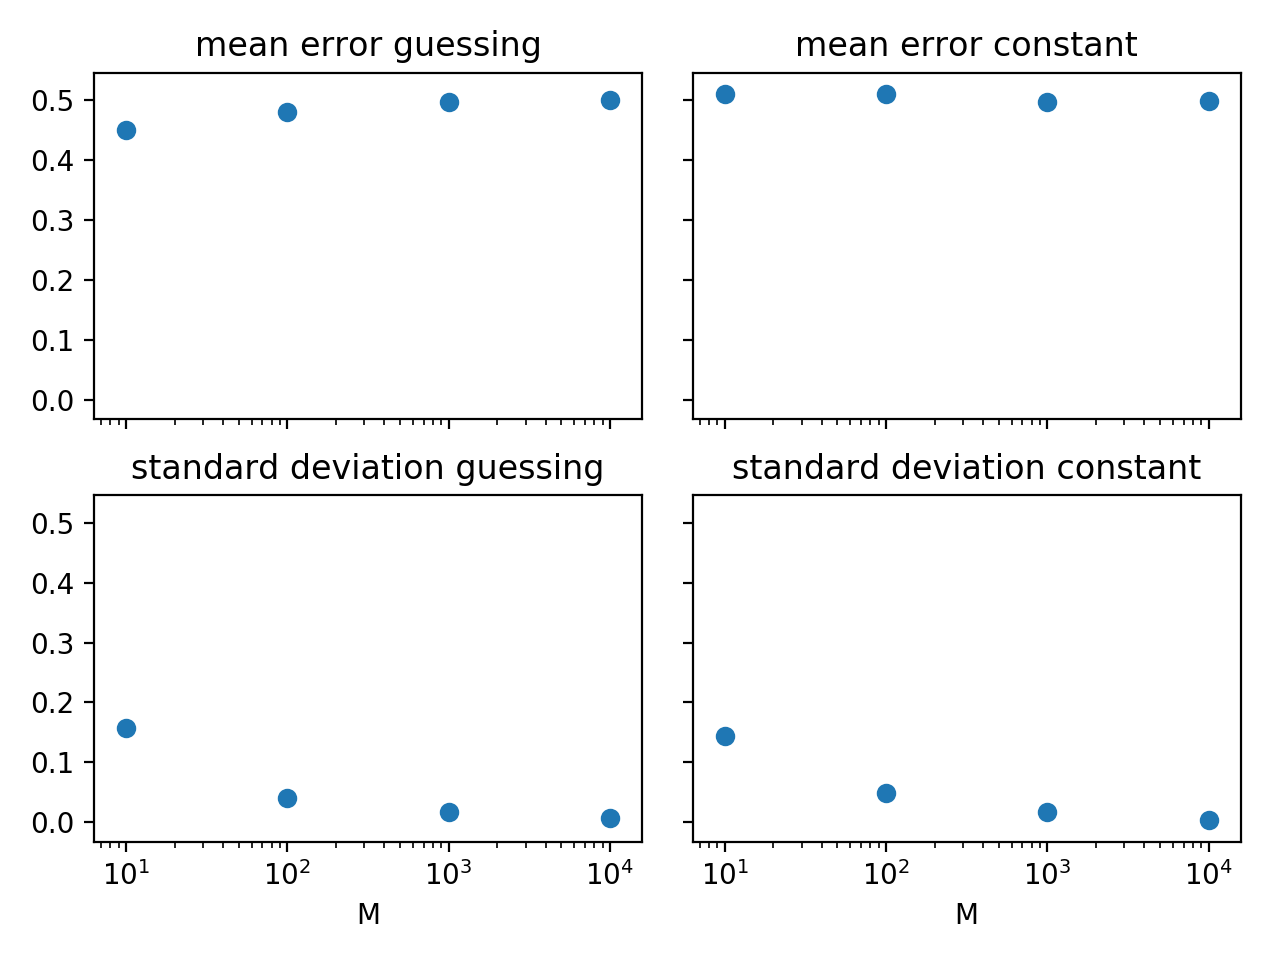

''

In [10]:
def f_C(X):
    return 0 if np.random.random() < 0.5 else 1

def f_D(X):
    return 1

def test_Classifier_1_3(M):
    errors_C = []
    errors_D = []
    for n in range(10):
        X, Y = create_data(M)
        error_C = 0
        error_D = 0
        for i in range(M):
            if f_C(X[i]) != Y[i]:
                error_C += 1
            if f_D(X[i]) != Y[i]:
                error_D += 1

        errors_C.append(error_C/M)
        errors_D.append(error_D/M)
        
    return np.array(errors_C), np.array(errors_D)


M_values = [10, 100, 1000, 10000]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, tight_layout=True, num=4)

mean_C = []
mean_D = []
std_C = []
std_D = []
for M in M_values:
    errors_C, errors_D = test_Classifier_1_3(M)
    
    mean_C.append(np.mean(errors_C))
    mean_D.append(np.mean(errors_D))
    std_C.append(np.std(errors_C))
    std_D.append(np.std(errors_D))

    
axs[0, 0].set_xscale("log")
axs[0, 0].scatter(M_values, mean_C)
axs[0, 0].title.set_text(f"mean error guessing")

axs[1, 0].set_xscale("log")
axs[1, 0].scatter(M_values, std_C)
axs[1, 0].title.set_text(f"standard deviation guessing")

axs[0, 1].set_xscale("log")
axs[0, 1].scatter(M_values, mean_D)
axs[0, 1].title.set_text(f"mean error constant")

axs[1, 1].set_xscale("log")
axs[1, 1].scatter(M_values, std_D)
axs[1, 1].title.set_text(f"standard deviation constant")

axs[1, 0].set_xlabel("M")
axs[1, 1].set_xlabel("M")
;

### 1.4 Nearest Neighbor Classification

In [13]:
def distance(x1, x2):
    return abs(x1 - x2)

def nnc(training_data, test_x, test_y):
    min_distance = None
    label = None
    for x, y in training_data.items():
        dist = distance(x, test_x)
        if min_distance is None or dist < min_distance:
            min_distance = dist
            label = y
    return label
    
        

        
M = 100
errors = []
training_Y = np.array([0, 1])

for m in range(M):
    training_X = create_features(training_Y)
    training_data = dict(zip(training_X, training_Y))
    
    test_size = 1000
    test_X, test_Y = create_data(test_size)
    test_data = dict(zip(test_X, test_Y))
    
    classified = np.array([nnc(training_data, x, y) for x, y in test_data.items()])
    
    error = 0
    for i, label in enumerate(classified):
        if label != test_Y[i]:
            error += 1
    errors.append(error / test_size)
    
error_mean = np.mean(errors)
error_std = np.std(errors)
print(f"{error_mean:0.3f} +- {error_std:0.3f}")
    


0.367 +- 0.174


In [14]:
M = 100
N = 100
errors = []

for m in range(M):
    training_X, training_Y = create_data(N)
    training_data = dict(zip(training_X, training_Y))
    
    test_size = 100
    test_X, test_Y = create_data(test_size)
    test_data = dict(zip(test_X, test_Y))
    
    classified = np.array([nnc(training_data, x, y) for x, y in test_data.items()])
    
    error = 0
    for i, label in enumerate(classified):
        if label != test_Y[i]:
            error += 1

    errors.append(error / test_size)
    
error_mean = np.mean(errors)
error_std = np.std(errors)
print(f"{error_mean:0.3f} +- {error_std:0.3f}")

0.334 +- 0.053
